# <center> Devoir Noté Python </center>

#### <center> KAROUNI Elias, HEM Murun, HRAOULI Samir<center>

## Importation des librairies

In [45]:
import math #librairie utilisé pour les fonctions mathématiques et le calcul scientifique
import scipy.stats as stats
from scipy.stats import norm ##librairie utilisé pour la loi normale
import matplotlib.pyplot as plt ##librairie graphique pour l'affichage de graphique
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np ##librairie utilisé pour la création de matrice
from math import *

## Partie 0: Le modèle de Black et Scholes

#### Exercice 1

Ecrivons la fonction Black & Scholes qui renverra le prix de l'option

In [46]:
def formule_Black_Scholes(S,K,r,T,sigma,call=True):
    
    """
    Calcule le prix d'un call ou d'un put par la méthode de Black et Scholes
    Arguments:
        S: C'est le prix de l'actif 
        K: C'est le prix d'exercice fixé par l'option(le strike) 
        r:  C'est le taux d'intêret continu
        T: C'est le temps restant avant la fin de l'option
        sigma: C'est la volatilité de l'actif
        call: Défini par défaut comme étant vrai, c'est le type de l'option. Si Call = True on a un Call, sinon c'est un Put
    Returns:
        Retourne le prix de l'option selon son type(Put ou Call) par la méthode de Black & Scholes
    """
    d1=(math.log(S/K)+(r+((sigma**2)/2)*T))/(sigma*math.sqrt(T))
    d2=d1-sigma*math.sqrt(T)
    
    ##Si l'option est un call
    if call==True:
        epsilon = 1
        Prix = epsilon*S*norm.cdf(epsilon*d1)-epsilon*K*math.exp(-r*T)*norm.cdf(epsilon*d2)
        
    ##Si l'option est un put
    else:
        epsilon = -1
        Prix = epsilon*S*norm.cdf(epsilon*d1)-epsilon*K*math.exp(-r*T)*norm.cdf(epsilon*d2)
        
    return Prix

In [47]:
formule_Black_Scholes(100,105,0.02,1,0.1, True)

2.7519486233365384

Nous adapterons la fonction créee précédemment, en tenant compte de la volatilité qui peut être nulle tout comme le temps restant avant la fin de l'option. Pour cela, elle renverra juste le max(epsilon*(S-K*math.exp(-r*T)),0) si l'une des deux conditions est remplie

In [48]:
def formule_Black_Scholes_avancee(S,K,r,T,sigma,call=True):
    
    """
    Calcule le prix d'un call ou d'un put par la méthode de Black et Scholes en tenant 
    compte que la volatilité ou le temps restant avant la fin de l'option soient égales à 0
    
    Arguments:
        S: C'est le prix de l'actif 
        K: C'est le prix d'exercice fixé par l'option(le strike) 
        r:  C'est le taux d'intêret continu
        T: C'est le temps restant avant la fin de l'option
        sigma: C'est la volatilité de l'actif
        call: Défini par défaut comme étant vrai, c'est le type de l'option. Si Call = True on a un Call, sinon c'est un Put
    Returns:
        Retourne le prix de l'option selon son type(Put ou Call) par la méthode de Black & Scholes
    """
    
    if call==True:
        
        epsilon=1
    
    if call==False:
        
        epsilon=-1

    if sigma==0 or T==0:
        
        return max(epsilon*(S-K*math.exp(-r*T)),0)

    d1=(math.log(S/K)+(r+sigma**2/2)*T)/(sigma*math.sqrt(T))
    d2=d1-sigma*math.sqrt(T)
    
    return epsilon*S*stats.norm.cdf(epsilon*d1)-epsilon*K*math.exp(-r*T)*stats.norm.cdf(epsilon*d2)

In [49]:
formule_Black_Scholes_avancee(100,105,0.02,1,0, True)

0

Nous écriverons maintenant la fonction parité put call, qui constitue la relation algébrique entre le call et celui du put. Celle ci, comparera deux chaines de caractère obtenue par le prix renvoyé par la méthode de Black & Scholes et le comparera à la chaine de caractère  (S - K*math.exp(-r*T) et testera l'égalité des deux membres. Pour information, les deux membres s'équivalent plus ou moins. Les dernières décimales changent, c'est pour cela qu'on a décidé de prendre uniquement les 3 premières chaines de caractère pour s'arrêter à 10^3 et que Python puisse effectuer correctement la comparaison

In [50]:
def parite_put_call(S, K, T, r, sigma):
    
    """
    Vérifie le respect de la parité put-call
    
    Arguments:
        S: C'est le prix de l'actif 
        K: C'est le prix d'exercice fixé par l'option(le strike) 
        r:  C'est le taux d'intêret continu
        T: C'est le temps restant avant la fin de l'option
        sigma: C'est la volatilité de l'actif
    Returns:
        Retourne True si la parité put-call est respectée avec les valeurs respectifs. Dans le cas contraire, retourne faux.
    """
        
    prix_call = formule_Black_Scholes_avancee(S,K,r,T,sigma,call=True)
    prix_put = formule_Black_Scholes_avancee( S,K,r,T,sigma,call=False)
    
    #convertion en chaine de caractère de façon à pouvoir récuperer les 4 premiers chiffres pour effectuer la comparaison
    parite = str(prix_call - prix_put)
    M = str((S - K*math.exp(-r*T)))
    
    if parite[1:3] == M[1:3]:
        print("la parité put-call est bien respectée. Le membre de gauche vaut : {}, \n Tandis que le membre de droite vaut: {}".format(parite, M))
        return True
    else: 
        print("la parité put-call n'est pas bien respectée. Le membre de gauche vaut : {}, \n Tandis que le membre de droite vaut: {}".format(parite, M))
        return False

In [51]:
parite_put_call(100, 105, 1, 0.1, 0.1)

la parité put-call est bien respectée. Le membre de gauche vaut : 4.9920711062242376, 
 Tandis que le membre de droite vaut: 4.992071106224245


True

## Partie 1: Le modèle CRR et applications aux options européennes

#### Exercice 2

Ecrivons la fonction sous_jacent, qui renverra le sous-jacent à chaque noeud de l'arbre CRR. Pour avoir cette idée d'abre, nous avons décidé de créer des listes imbriqués, où à chaque nouveau noeud, on aura les sous-jacent respectifs.

In [67]:
def sous_jacent_CRR(S0, Dt, r, sigma, n):
    
    """
    Calcule le prix sur chaque noeuds des sous-jacent
    
    Arguments:
        S0: le prix à l'instant t=0
        Dt: C'est le prix d'exercice fixé par l'option(le strike) 
        r:  C'est le taux d'intêret continu
        sigma: C'est la volatilité de l'actif
        n: le nombre de sous période
    Returns:
        Retourne un tableau imbriquée de liste contenant le sous jacent sur chacun des noeuds d'une sous période
    """
        
    sous_jacent = []
    
    u = math.exp((r-sigma**2/2)*Dt+sigma*math.sqrt(Dt)) #montée
    d = math.exp((r-sigma**2/2)*Dt-sigma*math.sqrt(Dt)) #descendre
    
    p = np.zeros((n+1, n+1))
    
    for i in range(n+1):
        pv = []
        for j in range(i+1):
            k = i-j
            if S0>0:
                p[j,i] = S0*u**j*d**k
                pv.append(S0*u**j*d**k)
        sous_jacent.append(pv)
                
    return p, sous_jacent

In [68]:
sous_jacent_CRR(100, 0.25, 0.02, 0.1, 4)[1]

[[100.0],
 [95.48032315427413, 105.52207639856866],
 [91.16492109644618, 100.7528195444534, 111.3490860746536],
 [87.04456126622586,
  96.19911768808677,
  106.31646721341012,
  117.49786767680395],
 [83.11042838521257,
  91.85122844014575,
  101.51130646157189,
  112.18734375719383,
  123.98618969660615]]

#### Exercice 3

Nous pouvons créer la fonction pour calculer le prix d'une option européenne par la méthode CRR. Nous aurons besoin de la fonction sous_jacent, établie précedemment. L'objectif sera dans un premier temps de calculer les pay-off. Et de redescendre dans la liste, pour calculer les prix intermédiaires jusqu'au dernier noeud, pour avoir le prix final.

In [66]:
def option_eu_CRR(S0, K, T, r, sigma, n, call=True):
    
    
    """
    Calcule les prix par la méthode CRR pour une option européenne
    
    Arguments:
        S0: le prix à l'instant t=0
        K: C'est le prix d'exercice fixé par l'option(le strike) 
        r:  C'est le taux d'intêret continu
        sigma: C'est la volatilité de l'actif
        n: le nombre de sous période
        call(True/False): Définit le type de l'option
    Returns:
        Retourne un tableau imbriquée de liste contenant le prix calculé par la méthode CRR de l'option européenne
    """
    
    option_eu = []
    Dt = T/n
    sous_jacent_value = sous_jacent_CRR(S0, Dt, r, sigma, n)[0]
    arr = np.zeros((n+1,n+1))
    p=0.5
    
    ##on va descendre progressivement l'arbre avec un pas de -1 en partant de N+1 car les indices commençent à 0
    for j in range(n+1, 0, -1):
        
        pay_off=[]
        
        for i in range(j):
            
            
            #si ce sont les pay-off
            if(j==n+1):
                
                #si l'option est un call
                if call==True:
                    epsilon = 1
                    arr[i,j-1] = max(epsilon*(sous_jacent_value[i,j-1]-K), 0) 
                else:
                    epsilon = -1
                    arr[i,j-1] = max(epsilon*(sous_jacent_value[i,j-1]-K), 0)   
                    
            #Calcul des prix intermédiaires(pas les pay-off)
            else:
                arr[i,j-1] = math.exp(-r*Dt) * (p*arr[i,j] + (1-p)*arr[i+1,j]) 
                
            pay_off.append(arr[i,j-1])
        
        option_eu.append(pay_off)
    
    return option_eu[::-1]

In [55]:
option_eu_CRR(100, 105, 1, 0.02, 0.1, 4, call=True)

[[2.9243960758354786],
 [0.8850422686553973, 4.993067075678112],
 [0.0, 1.778957122976968, 8.257232734117707],
 [0.0, 0.0, 3.5757483653277404, 13.021496205549061],
 [0.0, 0.0, 0.0, 7.18734375719383, 18.986189696606147]]

In [56]:
def modele_de_convergence(S0, K, T, r, sigma, n, call=True):
    
    
    """
    Permet de vérifier que la méthode par CRR et celle de Black & Scholes convergent vers le même prix quand n est grand
    
    Arguments:
        S0: le prix à l'instant t=0
        K: C'est le prix d'exercice fixé par l'option(le strike) 
        r:  C'est le taux d'intêret continu
        sigma: C'est la volatilité de l'actif
        n: le nombre de sous période
        call(True/False): Définit le type de l'option
    Returns:
       Aucun retour
    """
        
    
    liste_modele_CRR = []
    liste_modele_Black_et_Scholes = []
    
    etape = list(range(10,n, 5))
    
    
    for i in etape:
        #on appel i, l'iteration de la boucle pour faire tendre i vers l'infini pour l'option CRR
        liste_modele_CRR.append(option_eu_CRR(S0, K, T, r, sigma, i,call=True)[0])
        liste_modele_Black_et_Scholes.append(formule_Black_Scholes(S0,K,r,T,sigma,call=True))
            
    plt.plot(etape, liste_modele_Black_et_Scholes, label="Black et Scholes")
    plt.plot(etape, liste_modele_CRR, label="CRR")
    
    plt.xlabel("Valorisation de l'option")
    plt.ylabel("Nombre d'étapes")
    plt.legend(loc="upper right")
    
    plt.show()
        
    

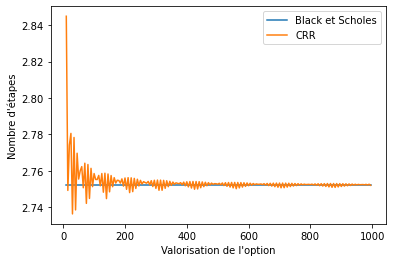

In [57]:
modele_de_convergence(100, 105, 1, 0.02, 0.1, 1000, call=True)

Nous constatons que les deux modèles convergent vers la même valeur lorsque n tend vers l'infini. 

### II. Applications aux options américaines

Nous passerons maintenant aux options américaines. Nous allons créer une fonction qui calcule le prix par la méthode CRR d'une option américaine. Elle ressemble beaucoup à celle de l'option européenne, mais il y a pas mal de changement. Tout d'abord, elle retournera deux listes:
1. Une liste contenant les prix de l'option
2. Une liste de valeurs boolénnes si l'option est exercé ou non selon le noeud

In [69]:
def option_am_CRR(S0, K, T, r, sigma, n, call=True):
    
    """
    Calcule les prix par la méthode CRR pour une option américaine
    
    Arguments:
        S0: le prix à l'instant t=0
        K: C'est le prix d'exercice fixé par l'option(le strike) 
        r:  C'est le taux d'intêret continu
        sigma: C'est la volatilité de l'actif
        n: le nombre de sous période
        call(True/False): Définit le type de l'option
    Returns:
        Retourne deux tableau imbriquée de liste contenant:
        -Les prix de l'option américaine sur chaque noeud
        -La matrice boolénnes d'exercice de l'option
    """
    
    
    option_am = []
    exercer = []
    
    Dt = T/n
    sous_jacent_value = sous_jacent_CRR(S0, Dt, r, sigma, n)[0]
    arr = np.zeros((n+1,n+1))
    p=0.5
    
    ##on va descendre progressivement l'arbre avec un pas de -1 en partant de N+1 car les indices commençent à 0
    for j in range(n+1, 0, -1):
        
        pay_off=[]
        exercer_l = []
        
        for i in range(j):
            
            #si ce sont les pay-off
            if(j==n+1):
                
                #si l'option est un call
                if call==True:
                    epsilon = 1
                    arr[i,j-1] = max(epsilon*(sous_jacent_value[i,j-1]-K), 0) 
                    
                    ##condition d'exercice pour un call américain: gain > 0 et les prix = max(epsilon*prix-K), on remplie la liste
                    ##de valeurs True si la condition est vérifiée
                    if (epsilon*(sous_jacent_value[i, j-1]-K) > 0) and (arr[i,j-1] == max(epsilon*(sous_jacent_value[i, j-1]-K),0)):
                        exercer_l.append(True)
                    #sinon on remplie la liste de valeur False
                    else:
                        exercer_l.append(False)
                        
                #sinon l'option est un put
                else:
                    epsilon = -1
                    
                    arr[i,j-1] = max(epsilon*(sous_jacent_value[i,j-1]-K), 0)  
                    
                    ##condition d'exercice pour un put américain: gain > 0 et les prix = max(epsilon*prix-K), on remplie la liste
                    ##de valeurs True si la condition est vérifiée
                    if (epsilon*(sous_jacent_value[i, j-1]-K) > 0) and (arr[i,j-1] == max(epsilon*(sous_jacent_value[i, j-1]-K),0)):
                        exercer_l.append(True)
                    #sinon on remplie la liste de valeur False
                    else:
                        exercer_l.append(False)
            #cas de remplissage de l'arbre où on a pas les pay-off donc que j est différent de n+1
            else:
                
                
                arr[i,j-1] = max(math.exp(-r*Dt) * (p*arr[i,j] + (1-p)*arr[i+1,j]), epsilon*(sous_jacent_value[i, j-1]-K))
                
                #si l'option est un call américain
                if call==True:
                    
                    epsilon = 1
                    
                    if (epsilon*(sous_jacent_value[i, j-1]-K) > 0) and (arr[i,j-1] == max(epsilon*(sous_jacent_value[i, j-1]-K),0)):
                        exercer_l.append(True)
                    else:
                        exercer_l.append(False)
                        
                #si l'option est un put américain
                else:
                    epsilon = -1
                    
                    if (epsilon*(sous_jacent_value[i, j-1]-K) > 0) and (arr[i,j-1] == max(epsilon*(sous_jacent_value[i, j-1]-K),0)):
                        exercer_l.append(True)
                    else:
                        exercer_l.append(False)
                
                
            pay_off.append(arr[i,j-1])
            
        exercer.append(exercer_l)
        
        option_am.append(pay_off)
    

    return option_am[::-1], exercer[::-1]


Affichons le résultat pour la matrice boolénne contenant les exercices pour l'option américaine

In [90]:
option_am_CRR(100, 105, 1, 0.02, 0.1, 4, call=True)[1]

[[False],
 [False, False],
 [False, False, False],
 [False, False, False, False],
 [False, False, False, True, True]]

Nous pouvons également afficher les prix de l'option américaine

In [89]:
option_am_CRR(100, 105, 1, 0.02, 0.1, 4, call=True)[0]

[[2.9243960758354786],
 [0.8850422686553973, 4.993067075678112],
 [0.0, 1.778957122976968, 8.257232734117707],
 [0.0, 0.0, 3.5757483653277404, 13.021496205549061],
 [0.0, 0.0, 0.0, 7.18734375719383, 18.986189696606147]]

### III. Visualisation graphiques

Après avoir testé nos fonctions, nous procéderons à la visualisation graphique. 

In [70]:
def graphe_fonction(F, xmin, xmax, n=100, format='', show=True, **kargs):
    
    '''Afficher le graphe d'une fonction sur un intervalle donné.

    Arguments
    --------
    F: Une fonction Python qui reçoit un int/float et qui renvoie un int/float.
       La fonction à visualiser.
    xmin, xmax: Deux int/float tels que xmin<xmax.
                Les bornes de l'intervalle sur lequel le graphe de F sera tracé.
    n: Le nombre de points à prendre entre xmin et xmax pour discrétiser le graphe.
    format: chaîne de caractère du type 'g-' ou 'r+--' qui donnent les premières
            information sur le format du graphe.
    show: Valeur booléenne qui dit si la fonction affichera le graphe.
    **kargs: Autres arguments à mots clés qui seront passé à la fonction plt.plot.
    '''
    
    xlist = np.arange(xmin,xmax, (xmax-xmin)/n)
    ylist = [F(x) for x in xlist]
    plt.plot(xlist, ylist, format, **kargs)
    if show:
        plt.show()


In [71]:
def visualiser_grille(sous_jacent, option=None, exercer=None, save=None):
    
    '''Créer un graphe qui visualise les listes fournies dans les arguments.

    Les arguments  sous_jacent, options, exercer  doivent être les résultats
    renvoyés par les appels de fonctions
            sous_jacent_CRR(S0, Dt, r, sigma, n)
            option_eu_CRR(S0, Dt, r, sigma, n)
        ou  option_am_CRR(S0, Dt, r, sigma, n).

    Le graphe créé par cette fonction contient toujours le grille
    des prix du sous-jacent, qui est placé dans un système de
    coordonnées (temps vs. prix)

    Lorsque l'argument  option  est fourni, le graphe affiche aussi
    le prix P(t,s) de l'option au-dessus du prix s correspondants
    du sous-jacent.

    Lorsque l'argument  exercer  est fourni, le graphe affiche un
    feu vert à droite de chaque prix du sous-jacent si la valeur
    correspondante dans  exercer  est True, et un feu rouge si la
    valeur est False.

    Par défaut, la fonction affiche le graphe avec de pyplot.show().
    Si l'argument  save  est fourni, on suppose que c'est une chaîne
    de caractère. Alors la fonction n'affiche rien, mais sauvegarde
    le graphe dans un fichier dont le nom est donné par  save.
    '''
    
    n = len(sous_jacent)

    # Le test suivant vérifie si l'argument  sous_jacent  a la forme attendue.
    try:
        assert(n>1)
        for k in range(n):
            assert(len(sous_jacent[k])==k+1)
    except AssertionError:
        raise ValueError("La liste 'sous-jacent' n'a pas la forme attendue.")

    # Le test suivant vérifie si  option  a la même forme que  sous_jacent .
    try:
        if option != None:
            assert(len(option)==n)
            for k in range(n):
                assert(len(option[k])==k+1)
    except AssertionError:
        raise ValueError("La liste 'option' n'a pas la même forme que 'sous-jacent'.")

    # Le test suivant vérifie si  exercer  a la même forme que  sous_jacent .
    try:
        if exercer != None:
            assert(len(exercer)==n)
            for k in range(n):
                assert(len(exercer[k])==k+1)
    except AssertionError:
        raise ValueError("La liste 'exercer' n'a pas la même forme que 'sous-jacent'.")

    # On calcule les prix minimal et maximal qui se trouvent dans  sous_jacent
    # pour déterminer la plage des coordonnées dans laquelle le dessin sera fait.
    p_min = min(p_list[ 0] for p_list in sous_jacent) # prix minimal
    p_max = max(p_list[-1] for p_list in sous_jacent) # prix maximal
    p_text = (p_max-p_min)/15  # hauteur disponible pour une étiquette de texte

    # le title du graphe
    if option==None: # si l'on n'affiche que les prix du sous-jacent
        plt.title (r"Prix du sous-jacent dans un modèle CRR")
    else: # si l'on affiche les prix du sous-jacent et ceux d'une option
        plt.title (r"Prix du sous-jacent et d'une option dans un modèle CRR")

    # les étiquettes des 2 axes des coordonnées
    plt.xlabel(r'temps / $\Delta t$')
    plt.ylabel(r'prix du sous-jacent')
    # les plages de valeurs en abscisse et en ordonnées
    plt.xlim(-0.5, n-0.5)
    plt.ylim(p_min*0.92, p_max*1.08)

    # On trace les segments décoratifs qui indique les transitions possibles
    # entre les prix du sous-jacent à des instants successifs.
    for k in range(n-1):
        p_list1 = sous_jacent[k]
        p_list2 = sous_jacent[k+1]
        for i in range(k+1):
            plt.arrow(k, p_list1[i], 1, p_list2[i]  -p_list1[i])
            plt.arrow(k, p_list1[i], 1, p_list2[i+1]-p_list1[i])

    # Avant de commencer l'affichage des prix et des feux rouges/verts,
    # on définit les couleurs et formats à utiliser pour l'affichage.
    # Ces informations sont stockées dans des dictionnaires.
    # On déballera ces dictionnaires avec l'opérateur **
    # pour fournir des arguments à mots clés à des commandes d'affichage.
    couleur_sous_jacent = dict(edgecolor=(0.7,0.7,0.4), facecolor=(1,1,0.6)  )
    couleur_option      = dict(edgecolor=(0.5,0.5,1),   facecolor=(0.8,0.8,1))
    feu_rouge = dict(mfc=(1,0,0), mec=(0,0,0), marker='o', markersize=8)
    feu_vert  = dict(mfc=(0,1,0), mec=(0,0,0), marker='o', markersize=8)

    # La boucle principale pour afficher les prix et les feux rouges/verts
    for k in range(n):
        for i in range(k+1):
        # Pour chaque couple d'indices 0 <= i <= k < n:
            # On denote par  p  l'i-ème prix du sous-jacent à l'instant t_k
            p = sous_jacent[k][i]

            # On affiche un encadré contenant la valeur de p
            #   arrondi au 2ème chiffre après la virgule décimale,
            # à la position (k,p) dans le système de coordonnées.
            plt.text(k, p, r'{:.2f}'.format(p), ha="center", va="center",
                     bbox=dict(boxstyle="round",**couleur_sous_jacent))
            if option != None:
            # Si l'argument  option  est fourni:
                # On affiche un encadré contenant la valeur de  option[k][i]
                #   arrondi au 4ème chiffre après la virgule décimale,
                # à la position (k,p+p_text) dans le système de coordonnées.
                plt.text(k, p+p_text, r'{:.4f}'.format(option[k][i]),
                         ha="center", va="center", fontsize=8,
                         bbox=dict(boxstyle="round",**couleur_option))
            if exercer != None:
            # Si l'argument  exercer  est fourni:
                # On affiche un feu vert ou un feu rouge
                # à la position (k+0.41, p) dans le système de coordonnées.
                if exercer[k][i]:
                    # C'est un feu vert si  exercer[k][i] == True
                    plt.plot([k+0.41], [p], zorder=5, **feu_vert)
                else: # et un feu rouge sinon.
                    plt.plot([k+0.41], [p], zorder=5, **feu_rouge)

    # On affiche les legends qui expliquent les significations des symboles
    # utilisés pour le prix du sous-jacent, le prix de l'option, et la stratégie
    # optimale d'exerce.S
    legend_handles = []
    if option != None:
        # Legend pour le prix de l'option.s
        patch = patches.Patch(**couleur_option,label="prix de l'option")
        legend_handles.append(patch)
    # Legend pour le prix du sous-jacent.
    patch = patches.Patch(**couleur_sous_jacent, label='prix du sous-jacent')
    legend_handles.append(patch)
    if exercer != None:
        # Legend pour les feux verts ou feux rouges.
        patch = lines.Line2D([0], [0], color='w', label="exercer l'option", **feu_vert)
        legend_handles.append(patch)
        patch = lines.Line2D([0], [0], color='w', label="ne pas exercer", **feu_rouge)
        legend_handles.append(patch)

    # Les legends seront affichés en haut à droite du graphe.
    plt.legend(handles=legend_handles, loc='upper left')

    if save==None:
        # On affiche le graphe dans une fenêtre graphique
        # si l'addresse de sauvegarde  save  n'est pas fournie.
        plt.show()
    else:
        # On n'affiche pas le graphe, mais le sauvegarde comme un fichier
        # si l'addresse de sauvegarde est fournie dans  save .
        plt.savefig(save)
        plt.close()

# Les instructions suivantes affichera la visualisation pour une option américaine.
# sj    = sous_jacent_CRR(100, 0.25, 0.02, 0.1, 4)
# am,ex = option_am_CRR(100, 105, 1, 0.02, 0.1, 4, call=False)
# visualiser_grille(sj, option=am, exercer=ex)

# Les instructions suivantes ont été utilisées pour créer le graphes inclus
# dans l'appendice du sujet de projet.
# sj    = sous_jacent_CRR(100, 0.25, 0.02, 0.1, 4)
# eu    = option_eu_CRR(100, 105, 1, 0.02, 0.1, 4, call=True)
# am,ex = option_am_CRR(100, 105, 1, 0.02, 0.1, 4, call=True)
# visualiser_grille(sj, option=None, exercer=None, save="sous_jacent.png")
# visualiser_grille(sj, option=eu,   exercer=None, save="option_eu_call.png")
# visualiser_grille(sj, option=am,   exercer=ex,   save="option_am_call.png")
# eu    = option_eu_CRR(100, 105, 1, 0.02, 0.1, 4, call=False)
# am,ex = option_am_CRR(100, 105, 1, 0.02, 0.1, 4, call=False)
# visualiser_grille(sj, option=eu,   exercer=None, save="option_eu_put.png")
# visualiser_grille(sj, option=am,   exercer=ex,   save="option_am_put.png")

In [72]:
sj = sous_jacent_CRR(100, 0.25, 0.02, 0.1, 4)[1]

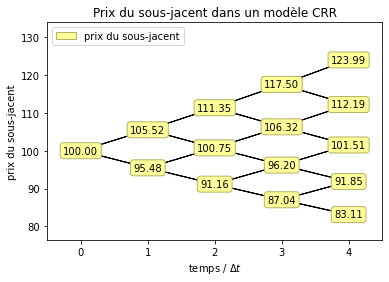

In [73]:
visualiser_grille(sj, option=None, exercer=None, save=None)

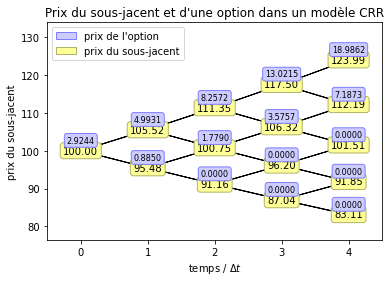

In [81]:
eu    = option_eu_CRR(100, 105, 1, 0.02, 0.1, 4, call=True)
visualiser_grille(sj, option=eu, exercer=None)

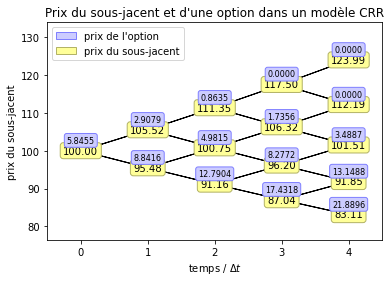

In [82]:
eu    = option_eu_CRR(100, 105, 1, 0.02, 0.1, 4, call=False)
visualiser_grille(sj, option=eu, exercer=None)

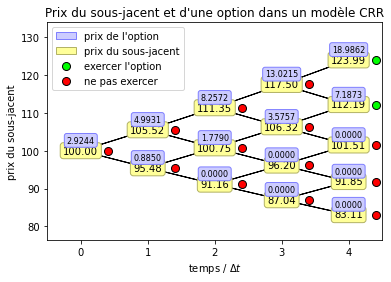

In [84]:
am, ex    = option_am_CRR(100, 105, 1, 0.02, 0.1, 4, call=True)
visualiser_grille(sj, option=am, exercer=ex)

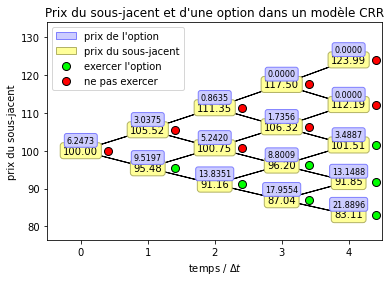

In [85]:
am, ex    = option_am_CRR(100, 105, 1, 0.02, 0.1, 4, call=False)
visualiser_grille(sj, option=am, exercer=ex)